In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qnm
import h5py
import sys
sys.path.insert(1, '/home/hzhu/Desktop/research/gr/nonlinearity/src/')
from fitting import *

# Radial characteristic speed

In [2]:
def Cp(r,a,theta=0):
    return(-((1 - 1.*r + a**2*r**2*np.cos(theta))/(2. - 2.*a**2*r*np.cos(theta))))

In [3]:
def Cm(r,a,theta=0):
    return(r**2/(2 + 2.*r))

In [4]:
r = np.linspace(0.01,0.99,100)
a=0

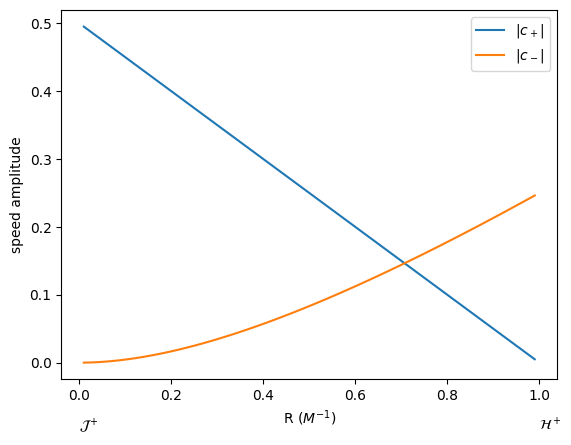

In [5]:
plt.plot(r,np.abs(Cp(r,a)),label='$|c_+|$')
plt.plot(r,Cm(r,a),label='$|c_-|$')
plt.legend()
plt.text(0,-0.1,"$\mathcal{J}^+$")
plt.text(1,-0.1,"$\mathcal{H}^+$")

plt.xlabel('R ($M^{-1}$)')
plt.ylabel('speed amplitude')
plt.savefig('./char_speed.png',dpi=300)
plt.show()

# Time delay and effects on radial profile

## Time delay for Schwarzschild

In [6]:
def taup(r,a,theta=0):
    return(2*np.log(1-r))
def taum(r,a,theta=0):
    return 2 - 2/r + 2*np.log(r)

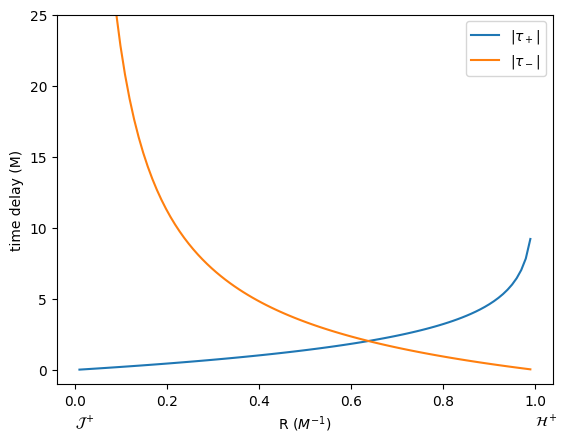

In [7]:
plt.plot(r,np.abs(taup(r,a)),label='$|\\tau_+|$')
plt.plot(r,np.abs(taum(r,a)),label='$|\\tau_-|$')
plt.legend()
plt.text(0,-4,"$\mathcal{J}^+$")
plt.text(1,-4,"$\mathcal{H}^+$")

plt.xlabel('R ($M^{-1}$)')
plt.ylabel('time delay (M)')
plt.ylim(-1,25)
plt.savefig('./time_delay.png',dpi=300)
plt.show()

In [8]:
omegas22 = np.array(omegas22)

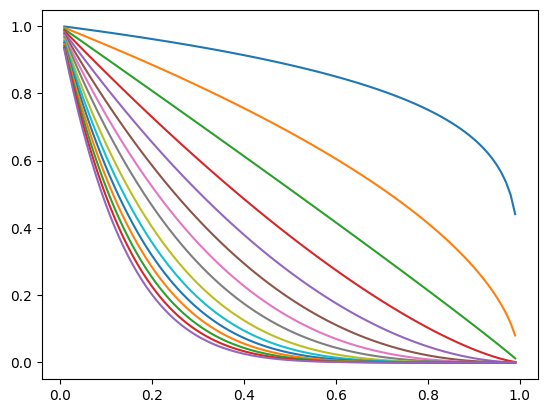

In [9]:
for om in omegas22.imag:
    plt.plot(r,np.exp(-om*taup(r,a)),label='$|\\tau_+|$')
plt.show()

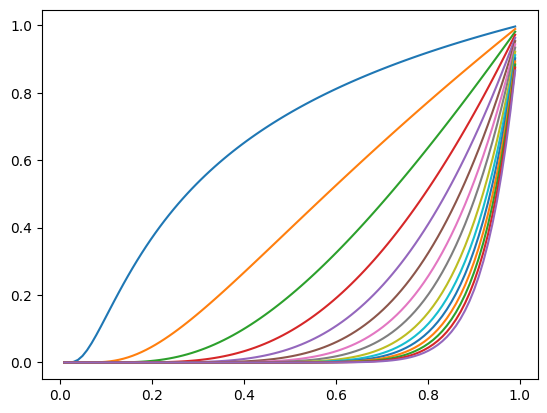

In [10]:
for om in omegas22.imag:
    plt.plot(r,np.exp(-om*taum(r,a)),label='$|\\tau_+|$')


In [45]:
rs_radial = []
radial_wf_pro = []
omegas_pro = []
radial_coeff_pro = []
amps = []

file = h5py.File("../data/qnm/a0.0_l2_m2.h5",'r')
for i in range(10):
    rs_radial.append(np.array(file['[n=%s]'%i]['rvals'])*2)
    radial_wf_pro.append(np.array(file['[n=%s]'%i]['radial_func']))
    radial_coeff_pro.append(np.array(file['[n=%s]'%i]['radial_coef']))
    omegas_pro.append(np.array(file['[n=%s]'%i]['omega']))
    amps.append(np.abs(radial_wf_pro[i]/radial_wf_pro[i][-1]))

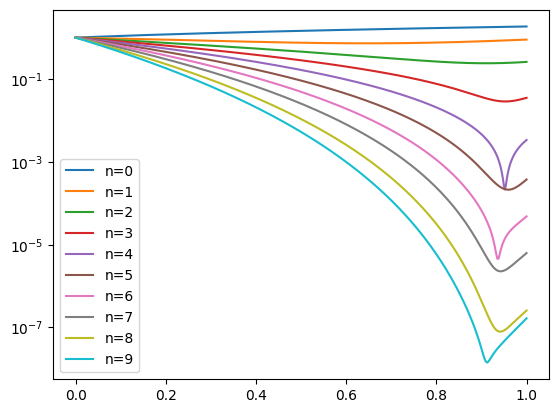

In [46]:
for i in range(10):
    plt.plot(rs_radial[i],np.abs(radial_wf_pro[i]/radial_wf_pro[i][-1]),label='n=%s'%i)
plt.legend()
plt.yscale('log')

In [47]:
omegas_pro

[array(0.37367168-0.08896232j),
 array(0.346711-0.27391488j),
 array(0.30105345-0.47827698j),
 array(0.25150496-0.7051482j),
 array(0.20751458-0.94684489j),
 array(0.1692994-1.19560805j),
 array(0.13325234-1.44791063j),
 array(0.09282234-1.70384117j),
 array(8.71854223e-12-2.03226926j),
 array(0.06326546-2.30264556j)]

In [41]:
c=['r','b','purple','orange','pink','yellow','grey']

(0.5, 1.1)

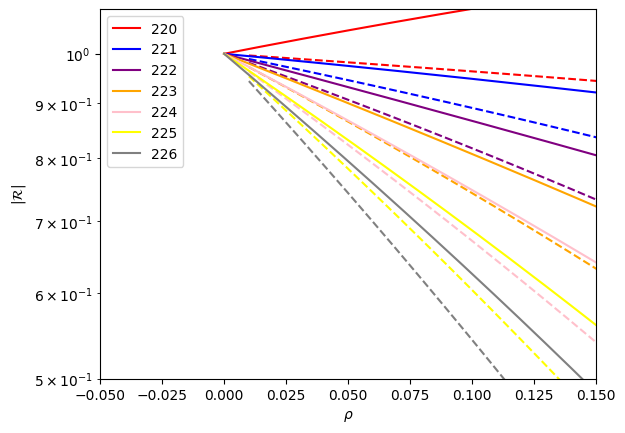

In [42]:
for i in range(7):
    plt.plot(rs_radial[i],amps[i],label='22%s'%i,c=c[i])
    plt.plot(r,np.exp(-2*omegas22.imag[i]*taup(r,a)),'--',c=c[i])

plt.legend(loc=2)
plt.ylabel("$|\mathcal{R}|$")
plt.xlabel("$\\rho$")
plt.yscale('log')
#plt.text(0,5e-10,'$\mathcal{I}^+$')
#plt.text(1,5e-10,'$\mathcal{H}^+$')
plt.xlim(-0.05,0.15)
plt.ylim(0.5,1.1)

Text(0.5, 0, '$\\rho$')

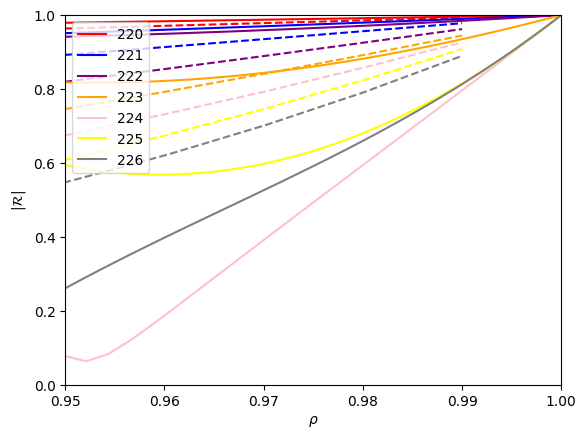

In [16]:
for i in range(7):
    plt.plot(rs_radial[i],amps[i]/amps[i][0],label='22%s'%i,c=c[i])
    plt.plot(r,np.exp(-2*omegas22.imag[i]*taum(r,a)),'--',c=c[i])
    #plt.plot(r,np.exp(-om*taum(r,a)),label='$|\\tau_+|$')

plt.xlim(0.95,1)
plt.ylim(0,1)
plt.legend(loc=2)
plt.ylabel("$|\mathcal{R}|$")
plt.xlabel("$\\rho$")
#plt.text(0,5e-10,'$\mathcal{I}^+$')
#plt.text(1,5e-10,'$\mathcal{H}^+$')
#plt.xlim(-0.05,0.15)
#plt.ylim(0.5,1.1)

/tmp/ipykernel_138157/1969077854.py:2: RuntimeWarning: divide by zero encountered in log
  return(2*np.log(1-r))
/tmp/ipykernel_138157/1852995647.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(rs_radial[i],amps[i]/np.exp(-2*omegas22.imag[i]*taup(rs_radial[i],a)),label='22%s'%i,c=c[i],s=5)
/tmp/ipykernel_138157/1852995647.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(rs_radial[0],rs_radial[0]/decay(rs_radial[0]))


(0.0, 3.0)

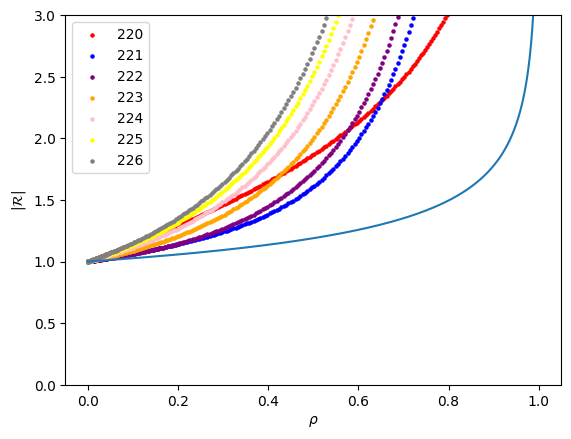

In [48]:
for i in range(7):
    plt.scatter(rs_radial[i],amps[i]/np.exp(-2*omegas22.imag[i]*taup(rs_radial[i],a)),label='22%s'%i,c=c[i],s=5)
plt.plot(rs_radial[0],rs_radial[0]/decay(rs_radial[0]))
plt.legend(loc=2)
plt.ylabel("$|\mathcal{R}|$")
plt.xlabel("$\\rho$")
#plt.xlim(0,0.001)
#plt.ylim(0.9975,1.0025)
plt.ylim(0,3)

The residual after the division does not seem to have the same slope, so this is not a simple uniform metric effect

pretty close though!

# Volumetric effect

In [30]:
def decay(r):
    return(1/np.sqrt(np.sqrt(1/(r**4-r**5))))

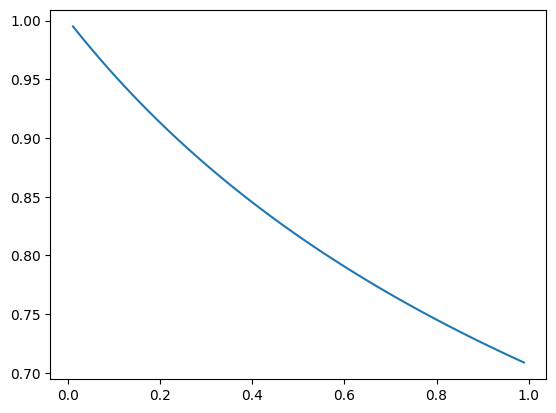

In [46]:
plt.plot(r,r/np.sqrt(1+r)/r)

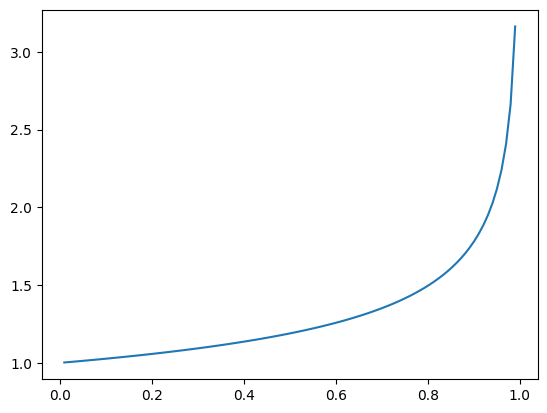

In [35]:
#plt.plot(r,decay(r))
#plt.plot(r,r)
plt.plot(r,r/decay(r))